<a href="https://colab.research.google.com/github/PatriciaLucas/CausalFeatureSelection/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
results = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/CausalFeatureSelection/main/results.csv', sep=';')
results.head(3)

,Unnamed: 0,name_dataset,model_name,method_graph,size_graph,window,max_lags,step_ahead,time_graph,yhat,y_test,nrmse
0,0,DOWJONES.csv,RF,LASSO,31,1,10,1,12.46,b'\x00\x1cC\x00\xf0XG\xc0\x00\xac6\xff\xaf\x87...,"b'}Z/\xa5k\xad\x03\xc0acl""\xc4d=\xc0\x1c\xda\x...",0.137639
1,1,DOWJONES.csv,RF,LASSO,31,2,10,1,12.46,b'\x00\xa8\x83\xf5\x7fz\x13@\xc0\xfe\x96\x00\\...,b'8\xb6\x14\xb0\x00c\x1e\xc0W\x96\td\xef\x7f*\...,0.126793
2,2,DOWJONES.csv,RF,LASSO,31,3,10,1,12.46,b'\x00d\xb5\xf9\x7f\xa4>@\x00t\xb0\xfe\xcfLI@\...,b'\xb1\xe4\x1e\xadK5D@Ft\xca\xfa6q:@\xfb\xff\x...,0.107581


In [ ]:
def dataset(name):
  import numpy as np
  results = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/CausalFeatureSelection/main/results.csv', sep=';')
  results = results.loc[results['name_dataset'] == name]

  results['size_graph'] = results['size_graph'].astype(int)
  avg = results.groupby(['name_dataset','method_graph','step_ahead']).mean(numeric_only=True)
  std = results.groupby(['name_dataset','method_graph', 'step_ahead']).std(numeric_only=True)
  return results, avg, std


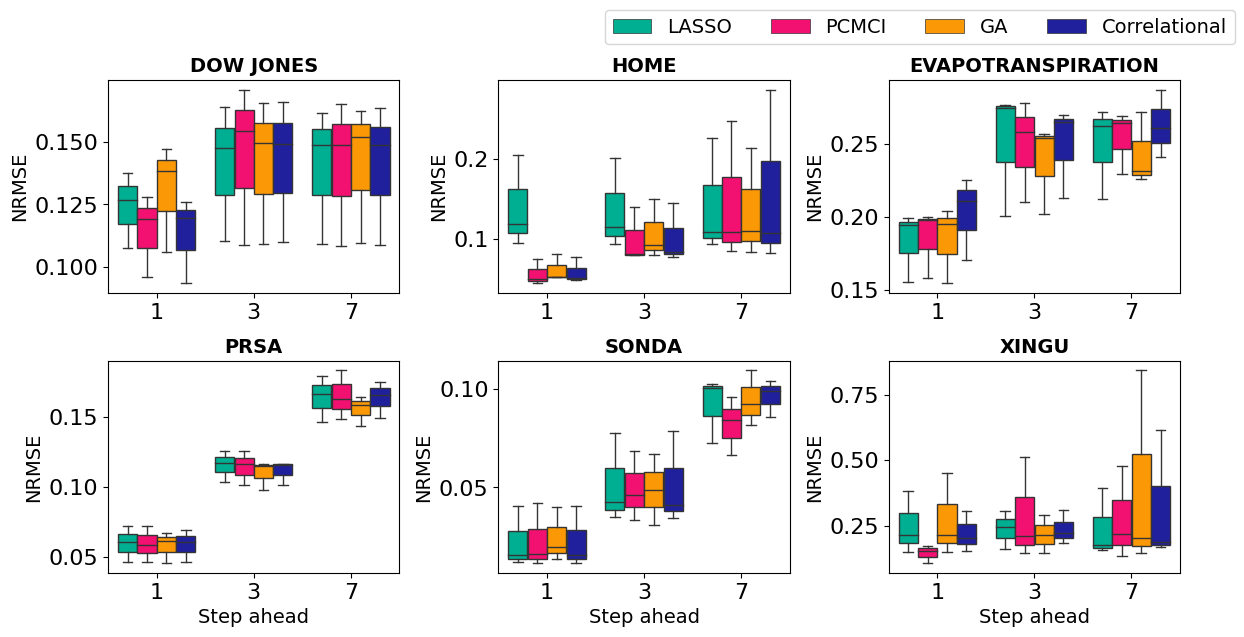

In [ ]:
names = ['DOWJONES.csv', 'HOME.csv', 'EVAPOTRANSPIRATION.csv', 'PRSA.csv','SONDA.csv', 'XINGU.csv']
nome = ['DOW JONES', 'HOME', 'EVAPOTRANSPIRATION', 'PRSA', 'SONDA', 'XINGU']
ncols = len(names)
fig, axes = plt.subplots(2,3, figsize=(12,6))
plt.style.use('default')
i=0
for name, ax in zip(names, axes.flatten()):
    base,_,_ = dataset(name)
    b = sns.boxplot(data=base, x="step_ahead", y="nrmse", hue="method_graph",linewidth=1, saturation=1, palette=sns.color_palette(['#00AF91','#F21170','#FA9905','#21209C'],4), ax=ax)
    if i > 2:
        b.set_xlabel("Step ahead",fontsize=14)
    else:
        b.set_xlabel("",fontsize=14)
    b.set_ylabel("NRMSE",fontsize=14)
    ax.get_legend().remove()
    ax.set_title(nome[i], weight='bold',fontsize=14)
    b.tick_params(labelsize=16)
    i += 1
    pass

fig.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', ncol=4, bbox_to_anchor=(.5, 0.98),  fontsize=14)
pass

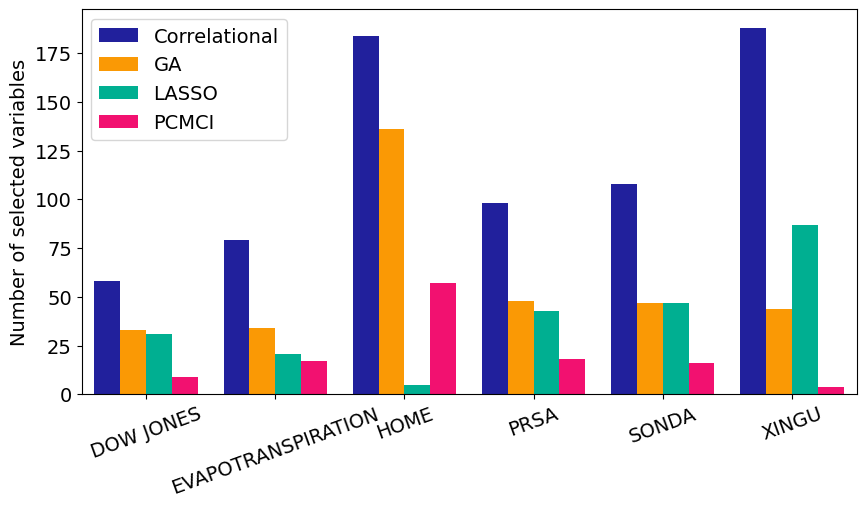

In [ ]:
results = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/CausalFeatureSelection/main/results.csv', sep=';')

results['size_graph'] = results['size_graph'].astype(int)
results['name_dataset'].mask(results['name_dataset'] == 'EVAPOTRANSPIRATION.csv', 'EVAPOTRANSPIRATION', inplace=True)
results['name_dataset'].mask(results['name_dataset'] == 'DOWJONES.csv', 'DOW JONES', inplace=True)
results['name_dataset'].mask(results['name_dataset'] == 'HOME.csv', 'HOME', inplace=True)
results['name_dataset'].mask(results['name_dataset'] == 'SONDA.csv', 'SONDA', inplace=True)
results['name_dataset'].mask(results['name_dataset'] == 'XINGU.csv', 'XINGU', inplace=True)
results['name_dataset'].mask(results['name_dataset'] == 'PRSA.csv', 'PRSA', inplace=True)
avg = results.groupby(['name_dataset','method_graph','size_graph']).mean(numeric_only=True)
avg = avg.reset_index()
plt.figure(figsize=(10, 5))
b = sns.barplot(data=avg, x="name_dataset", y='size_graph', hue="method_graph", linewidth=1, saturation=1, palette=sns.color_palette(['#21209C','#FA9905','#00AF91','#F21170'],4))
plt.xticks(rotation=20)
b.set_xlabel("")
b.set_ylabel("Number of selected variables",fontsize=14)
b.tick_params(labelsize=14)
plt.legend(title='Graph method')
plt.legend(fontsize=14)
pass